# IMDB-Capstone Machine learning
### NUPRIYA saxena
##### Internship -34
###### Batch-DS0622

# Capstone Project

#### 1) Now make only 1 data frame of two CSV files using the join operation of pandas and start doing EDA.

<b>importing libraries<b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

<b>loading the dataset<b>

In [2]:
df1=pd.read_csv("movies1.csv")

In [3]:
df1

,Unnamed: 0,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN
2,2,3,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN
3,3,4,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN
4,4,5,The Lord of the Rings: The Two Towers,179,2002,8.8,87,Peter Jackson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1738,1738,"1,739",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN
1739,1739,"1,740",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN
1740,1740,"1,741",Angels Apocalypse,85,2015,1.7,Nan,Sean Cain,Enzo Zelocchi,NaN
1741,1741,"1,742",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN


In [4]:
df2=pd.read_csv("movies2.csv")

In [5]:
df2

,Unnamed: 0,MovieName,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
0,0,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,714,822"
1,1,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,885,048"
2,2,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,409,922"
3,3,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,913,811"
4,4,The Lord of the Rings: The Two Towers,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,Action,Adventure,Drama,342.55,PG-13,"1,701,534"
...,...,...,...,...,...,...,...,...,...,...,...,...
1738,1738,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,711"
1739,1739,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,508"
1740,1740,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,911"
1741,1741,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,406"


In [6]:
dfall = pd.merge(df1, df2, on ='MovieName')

In [7]:
dfall

,Unnamed: 0_x,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,...,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,714,822"
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,885,048"
2,2,3,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,...,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,409,922"
3,3,4,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,913,811"
4,4,5,The Lord of the Rings: The Two Towers,179,2002,8.8,87,Peter Jackson,NaN,NaN,...,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,Action,Adventure,Drama,342.55,PG-13,"1,701,534"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,1738,"1,739",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,...,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,711"
1825,1739,"1,740",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,...,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,508"
1826,1740,"1,741",Angels Apocalypse,85,2015,1.7,Nan,Sean Cain,Enzo Zelocchi,NaN,...,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,911"
1827,1741,"1,742",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,...,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,406"


### 2) Do the complete EDA in detail to explore the insights of data and write detailed observations of each analysis.

# EDA

In [8]:
dfall.head(3)

,Unnamed: 0_x,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,...,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,714,822"
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,885,048"
2,2,3,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,...,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,409,922"


In [9]:
dfall.head

<bound method NDFrame.head of       Unnamed: 0_x  S No.                                          MovieName  \
0                0      1                                    The Dark Knight   
1                1      2      The Lord of the Rings: The Return of the King   
2                2      3                                          Inception   
3                3      4  The Lord of the Rings: The Fellowship of the Ring   
4                4      5              The Lord of the Rings: The Two Towers   
...            ...    ...                                                ...   
1824          1738  1,739                                              Radhe   
1825          1739  1,740                                             Race 3   
1826          1740  1,741                                  Angels Apocalypse   
1827          1741  1,742                              The Cost of Deception   
1828          1742  1,743                                            Sadak 2   

      Dur

In [10]:
dfall.tail(3)

,Unnamed: 0_x,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,...,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
1826,1740,"1,741",Angels Apocalypse,85,2015,1.7,Nan,Sean Cain,Enzo Zelocchi,NaN,...,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,911"
1827,1741,"1,742",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,...,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,406"
1828,1742,"1,743",Sadak 2,133,2020,1.2,Nan,Mahesh Bhatt,NaN,NaN,...,Alia Bhatt,Sanjay Dutt,Priyanka Bose,Aditya Roy Kapoor,Action,Drama,Nan,Nan,TV-MA,"96,240"


In [11]:
dfall.tail

<bound method NDFrame.tail of       Unnamed: 0_x  S No.                                          MovieName  \
0                0      1                                    The Dark Knight   
1                1      2      The Lord of the Rings: The Return of the King   
2                2      3                                          Inception   
3                3      4  The Lord of the Rings: The Fellowship of the Ring   
4                4      5              The Lord of the Rings: The Two Towers   
...            ...    ...                                                ...   
1824          1738  1,739                                              Radhe   
1825          1739  1,740                                             Race 3   
1826          1740  1,741                                  Angels Apocalypse   
1827          1741  1,742                              The Cost of Deception   
1828          1742  1,743                                            Sadak 2   

      Dur

In [12]:
dfall.sample()

,Unnamed: 0_x,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,...,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
1613,1513,"1,514",George of the Jungle,92,1997,5.5,53,Sam Weisman,NaN,NaN,...,Brendan Fraser,Leslie Mann,Thomas Haden Church,Richard Roundtree,Action,Adventure,Comedy,105.26,PG,"81,591"


In [13]:
dfall.sample

<bound method NDFrame.sample of       Unnamed: 0_x  S No.                                          MovieName  \
0                0      1                                    The Dark Knight   
1                1      2      The Lord of the Rings: The Return of the King   
2                2      3                                          Inception   
3                3      4  The Lord of the Rings: The Fellowship of the Ring   
4                4      5              The Lord of the Rings: The Two Towers   
...            ...    ...                                                ...   
1824          1738  1,739                                              Radhe   
1825          1739  1,740                                             Race 3   
1826          1740  1,741                                  Angels Apocalypse   
1827          1741  1,742                              The Cost of Deception   
1828          1742  1,743                                            Sadak 2   

      D

In [14]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1829 entries, 0 to 1828
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0_x      1829 non-null   int64  
 1   S No.             1829 non-null   object 
 2   MovieName         1829 non-null   object 
 3   Duration          1829 non-null   int64  
 4   Year              1829 non-null   int64  
 5   Rating            1829 non-null   float64
 6   Metascore         1829 non-null   object 
 7   Director1         1829 non-null   object 
 8   Director2         113 non-null    object 
 9   Director3         12 non-null     object 
 10  Unnamed: 0_y      1829 non-null   int64  
 11  Star1             1829 non-null   object 
 12  Star2             1829 non-null   object 
 13  Star3             1829 non-null   object 
 14  Star4             1829 non-null   object 
 15  Genre1            1829 non-null   object 
 16  Genre2            1829 non-null   object 


In [15]:
dfall.info

<bound method DataFrame.info of       Unnamed: 0_x  S No.                                          MovieName  \
0                0      1                                    The Dark Knight   
1                1      2      The Lord of the Rings: The Return of the King   
2                2      3                                          Inception   
3                3      4  The Lord of the Rings: The Fellowship of the Ring   
4                4      5              The Lord of the Rings: The Two Towers   
...            ...    ...                                                ...   
1824          1738  1,739                                              Radhe   
1825          1739  1,740                                             Race 3   
1826          1740  1,741                                  Angels Apocalypse   
1827          1741  1,742                              The Cost of Deception   
1828          1742  1,743                                            Sadak 2   

      D

In [16]:
dfall.dtypes

Unnamed: 0_x          int64
S No.                object
MovieName            object
Duration              int64
Year                  int64
Rating              float64
Metascore            object
Director1            object
Director2            object
Director3            object
Unnamed: 0_y          int64
Star1                object
Star2                object
Star3                object
Star4                object
Genre1               object
Genre2               object
Genre3               object
Gross_Collection     object
Certification        object
votes                object
dtype: object

In [17]:
df1.shape

(1743, 10)

In [18]:
dfall.shape

(1829, 21)

### five column stars, votes , genre , Gross collection , Certification has been added to the database

In [19]:
dfall

,Unnamed: 0_x,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,...,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,714,822"
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,885,048"
2,2,3,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,...,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,409,922"
3,3,4,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,913,811"
4,4,5,The Lord of the Rings: The Two Towers,179,2002,8.8,87,Peter Jackson,NaN,NaN,...,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,Action,Adventure,Drama,342.55,PG-13,"1,701,534"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,1738,"1,739",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,...,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,711"
1825,1739,"1,740",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,...,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,508"
1826,1740,"1,741",Angels Apocalypse,85,2015,1.7,Nan,Sean Cain,Enzo Zelocchi,NaN,...,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,911"
1827,1741,"1,742",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,...,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,406"


In [20]:
print('No of Rows:',dfall.shape[0])
print('No of Columns:',dfall.shape[1])
dfall.head(3)

No of Rows: 1829
No of Columns: 21


,Unnamed: 0_x,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,...,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,714,822"
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,885,048"
2,2,3,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,...,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,409,922"


In [21]:
dfall.columns

Index(['Unnamed: 0_x', 'S No.', 'MovieName', 'Duration', 'Year', 'Rating',
       'Metascore', 'Director1', 'Director2', 'Director3', 'Unnamed: 0_y',
       'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2', 'Genre3',
       'Gross_Collection', 'Certification', 'votes'],
      dtype='object')

In [22]:
dfall.drop("Unnamed: 0_x",axis=1,inplace=True)

In [23]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1829 entries, 0 to 1828
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S No.             1829 non-null   object 
 1   MovieName         1829 non-null   object 
 2   Duration          1829 non-null   int64  
 3   Year              1829 non-null   int64  
 4   Rating            1829 non-null   float64
 5   Metascore         1829 non-null   object 
 6   Director1         1829 non-null   object 
 7   Director2         113 non-null    object 
 8   Director3         12 non-null     object 
 9   Unnamed: 0_y      1829 non-null   int64  
 10  Star1             1829 non-null   object 
 11  Star2             1829 non-null   object 
 12  Star3             1829 non-null   object 
 13  Star4             1829 non-null   object 
 14  Genre1            1829 non-null   object 
 15  Genre2            1829 non-null   object 
 16  Genre3            1829 non-null   object 


In [24]:
dfall.drop("Unnamed: 0_y",axis=1,inplace=True)

In [25]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1829 entries, 0 to 1828
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S No.             1829 non-null   object 
 1   MovieName         1829 non-null   object 
 2   Duration          1829 non-null   int64  
 3   Year              1829 non-null   int64  
 4   Rating            1829 non-null   float64
 5   Metascore         1829 non-null   object 
 6   Director1         1829 non-null   object 
 7   Director2         113 non-null    object 
 8   Director3         12 non-null     object 
 9   Star1             1829 non-null   object 
 10  Star2             1829 non-null   object 
 11  Star3             1829 non-null   object 
 12  Star4             1829 non-null   object 
 13  Genre1            1829 non-null   object 
 14  Genre2            1829 non-null   object 
 15  Genre3            1829 non-null   object 
 16  Gross_Collection  1829 non-null   object 


# Statistical Analysis

In [26]:
dfall.nunique()

S No.               1743
MovieName           1702
Duration             119
Year                  74
Rating                67
Metascore             87
Director1            943
Director2             90
Director3             12
Star1                719
Star2               1157
Star3               1322
Star4               1439
Genre1                 2
Genre2                16
Genre3                19
Gross_Collection    1357
Certification         17
votes               1731
dtype: int64

### Data Integrity Check

In [27]:
dfall.duplicated().sum()

0

<b>there is no duplicate values<b>

In [28]:
dfall.replace("Nan", np.nan, inplace=True)

In [29]:
dfall.isnull().sum()

S No.                  0
MovieName              0
Duration               0
Year                   0
Rating                 0
Metascore            193
Director1              0
Director2           1716
Director3           1817
Star1                  0
Star2                  1
Star3                  1
Star4                  2
Genre1                 0
Genre2                 2
Genre3               145
Gross_Collection     285
Certification         10
votes                  0
dtype: int64

#### Dropping off columns Director 2 and Director 3 as maxiumum entries are null values.

In [30]:
dfall.drop(["Director2","Director3"], axis=1, inplace=True)

Using mode to fill null values for object columns - Metascore, Certification and genre 3

In [31]:
dfall['Metascore']=dfall['Metascore'].fillna(dfall['Metascore'].mode()[0])
dfall['Certification'] = dfall['Certification'].fillna(dfall['Certification'].mode()[0])
dfall['Genre3'] =dfall['Genre3'].fillna(dfall['Genre3'].mode()[0])

First we converted column Gross collection to float dataype and then used mean to fill null values.

In [32]:
dfall['Gross_Collection'] = dfall['Gross_Collection'].astype(float)
dfall['Gross_Collection'] = dfall['Gross_Collection'].fillna(dfall['Gross_Collection'].mean())

In [33]:
dfall.isnull().sum().sum()

6

In [34]:
dfall.dropna(inplace=True)

In [35]:
dfall.isnull().sum().sum()

0

In [36]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 0 to 1828
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S No.             1825 non-null   object 
 1   MovieName         1825 non-null   object 
 2   Duration          1825 non-null   int64  
 3   Year              1825 non-null   int64  
 4   Rating            1825 non-null   float64
 5   Metascore         1825 non-null   object 
 6   Director1         1825 non-null   object 
 7   Star1             1825 non-null   object 
 8   Star2             1825 non-null   object 
 9   Star3             1825 non-null   object 
 10  Star4             1825 non-null   object 
 11  Genre1            1825 non-null   object 
 12  Genre2            1825 non-null   object 
 13  Genre3            1825 non-null   object 
 14  Gross_Collection  1825 non-null   float64
 15  Certification     1825 non-null   object 
 16  votes             1825 non-null   object 


Treating all columns which should be integer datatype but are object datatype.

In [37]:
dfall['Metascore'] = dfall['Metascore'].astype(int)
dfall['votes'] = dfall['votes'].str.replace(',', '').astype(int)
dfall['S No.'] = dfall['S No.'].str.replace(',', '').astype(int)

<b>Let check how many question mark (" ?") inside dataset.<b>

In [38]:
dfall.isin([' ?']).sum()

S No.               0
MovieName           0
Duration            0
Year                0
Rating              0
Metascore           0
Director1           0
Star1               0
Star2               0
Star3               0
Star4               0
Genre1              0
Genre2              0
Genre3              0
Gross_Collection    0
Certification       0
votes               0
dtype: int64

### check null value

In [39]:
missing_values = dfall.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(dfall))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
S No.                          0             0.0
Star3                          0             0.0
Certification                  0             0.0
Gross_Collection               0             0.0
Genre3                         0             0.0
Genre2                         0             0.0
Genre1                         0             0.0
Star4                          0             0.0
Star2                          0             0.0
MovieName                      0             0.0
Star1                          0             0.0
Director1                      0             0.0
Metascore                      0             0.0
Rating                         0             0.0
Year                           0             0.0
Duration                       0             0.0
votes                          0             0.0


<AxesSubplot:>

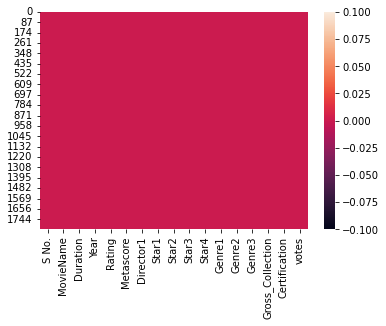

In [40]:
sns.heatmap(dfall.isnull())

<b>There is no missing data<b>

In [41]:
dfall.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'Gross_Collection', 'Certification', 'votes'],
      dtype='object')

Duration

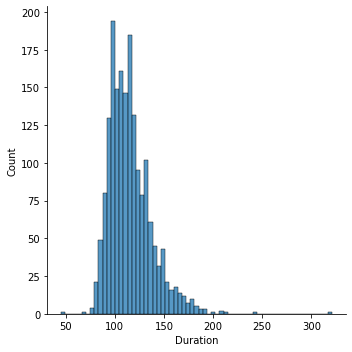

In [42]:
sns.displot(data=dfall, x="Duration")

alMost movies are 90 to 120 minutes long.

year

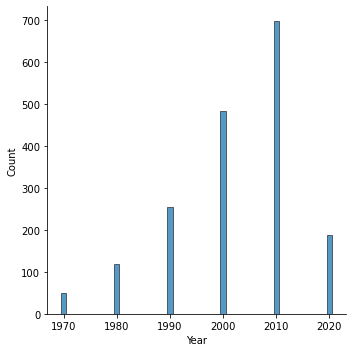

In [43]:
# Number of movies launched in the decades
sns.displot(pd.cut(dfall['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))
plt.show()

rating according to the year wise

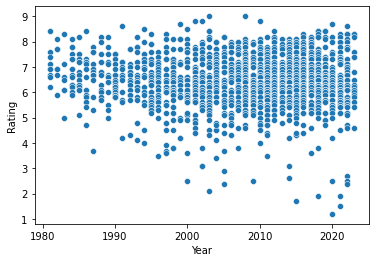

In [44]:
sns.scatterplot(x=dfall["Year"][dfall["Year"]>1980],y=dfall["Rating"])
plt.show()

Metascore

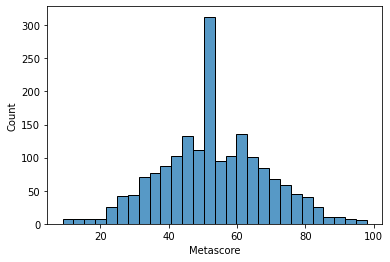

In [45]:
sns.histplot(x=dfall["Metascore"])
plt.show()


Genre

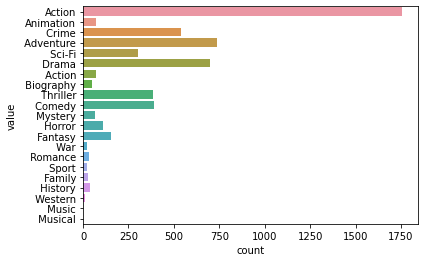

In [46]:
sns.countplot(data=pd.melt(dfall, value_vars=["Genre1", "Genre2", "Genre3"]), y="value")
plt.show()

Certification

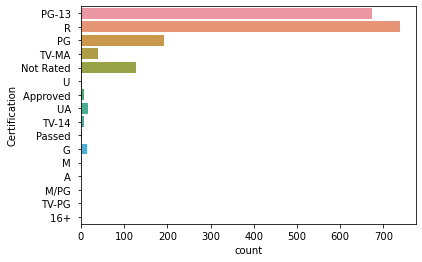

In [47]:
sns.countplot(y=dfall["Certification"])
plt.show()

mostly all the movies has a PG-13 certification

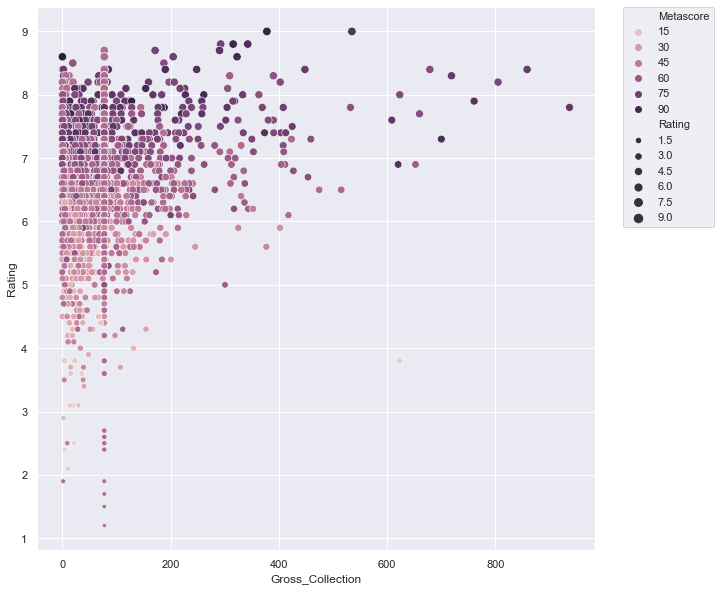

In [48]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Gross_Collection", y="Rating",
                      hue="Metascore", size="Rating",
                      data=dfall)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Higher rated movies have been found to have higher gross collection.
Even with high rating and metascore, movies have been found to be grossing below average.

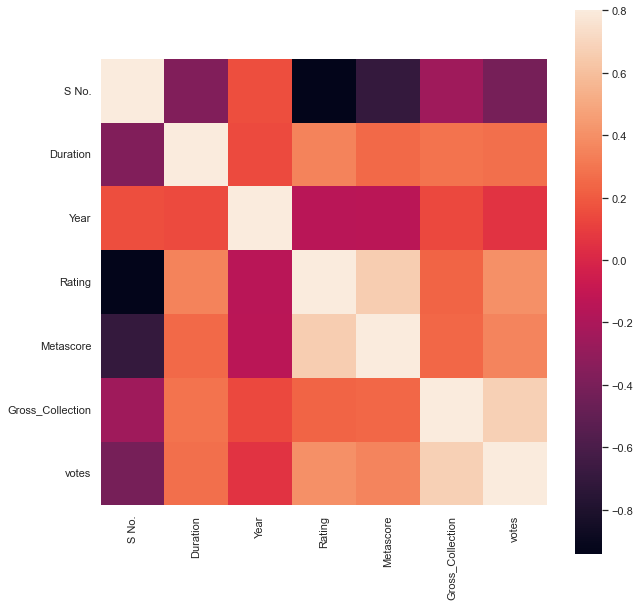

In [49]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dfall.corr(), vmax=.8, square=True)
plt.show()

columns which are not useful for machine learning

In [50]:
dfall.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'Gross_Collection', 'Certification', 'votes'],
      dtype='object')

In [51]:
df3=dfall.drop(["S No.","MovieName",], axis=1)

# Encoding the categorical data

In [52]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df3['Director1']=le.fit_transform(df3['Director1'])
df3['Star1']=le.fit_transform(df3['Star1'])
df3['Star2']=le.fit_transform(df3['Star2'])
df3['Star3']=le.fit_transform(df3['Star3'])
df3['Star4']=le.fit_transform(df3['Star4'])
df3['Genre1']=le.fit_transform(df3['Genre1'])
df3['Genre2']=le.fit_transform(df3['Genre2'])
df3['Genre3']=le.fit_transform(df3['Genre3'])
df3['Certification']=le.fit_transform(df3['Certification'])

In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 0 to 1828
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Duration          1825 non-null   int64  
 1   Year              1825 non-null   int64  
 2   Rating            1825 non-null   float64
 3   Metascore         1825 non-null   int32  
 4   Director1         1825 non-null   int32  
 5   Star1             1825 non-null   int32  
 6   Star2             1825 non-null   int32  
 7   Star3             1825 non-null   int32  
 8   Star4             1825 non-null   int32  
 9   Genre1            1825 non-null   int32  
 10  Genre2            1825 non-null   int32  
 11  Genre3            1825 non-null   int32  
 12  Gross_Collection  1825 non-null   float64
 13  Certification     1825 non-null   int32  
 14  votes             1825 non-null   int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 214.2 KB


All columns have been converted into integer or float datatype

# Outliers

In [58]:
z=np.abs(zscore(df3))
dfn=df3[(z<3).all(axis=1)]
dfn

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
7,153,2020,8.7,51,858,633,861,94,1357,0,5,4,77.612701,12,119393
19,101,2003,8.4,77,654,109,1138,638,734,0,5,11,0.710000,10,595512
20,101,2003,8.4,77,654,336,306,1098,1228,0,5,11,2.190000,10,78161
21,104,2013,5.8,49,828,109,1138,638,734,0,5,11,0.710000,10,595512
22,104,2013,5.8,49,828,336,306,1098,1228,0,5,11,2.190000,10,78161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,107,2000,3.6,14,163,351,499,1315,148,0,1,6,15.220000,8,35066
1808,95,1997,3.6,11,444,557,1040,499,1201,0,1,6,35.930000,8,56304
1809,99,2017,3.6,51,26,561,336,958,1044,0,5,4,77.612701,10,33478
1810,98,1996,3.5,40,192,503,44,14,276,0,11,4,3.790000,10,30242


In [59]:
df3

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
0,152,2008,9.0,84,151,119,406,2,897,0,4,4,534.860000,8,2714822
1,201,2003,9.0,94,680,184,1091,462,1014,0,1,4,377.850000,8,1885048
2,148,2010,8.8,74,151,407,559,351,719,0,1,13,292.580000,8,2409922
3,178,2001,8.8,92,680,184,424,936,1218,0,1,4,315.540000,8,1913811
4,179,2002,8.8,87,680,184,424,1260,1014,0,1,4,342.550000,8,1701534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,109,2021,1.9,51,699,575,273,1003,513,0,4,15,77.612701,12,178711
1825,160,2018,1.9,51,719,43,964,143,515,0,4,15,1.690000,6,47508
1826,85,2015,1.7,51,805,192,462,1078,1404,0,7,13,77.612701,10,42911
1827,125,2021,1.5,51,494,691,56,111,407,0,4,4,77.612701,10,39406


In [60]:
(1825-1546)*100/1825

15.287671232876713

15.28 % has been removed in outlier treatment, which is under considerable range.

# Skewness 

In [61]:
dfn.skew()

Duration            0.815692
Year               -0.907355
Rating             -0.261529
Metascore           0.119288
Director1          -0.130608
Star1               0.041292
Star2              -0.026241
Star3               0.032591
Star4               0.026619
Genre1              0.000000
Genre2              1.341467
Genre3              0.302943
Gross_Collection    1.777344
Certification      -0.189201
votes               1.927616
dtype: float64

In [62]:
from sklearn.preprocessing import power_transform

for i in dfn.drop(["Gross_Collection","votes"],axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[[f'{i}']]=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Duration
treated skewness for : Year
treated skewness for : Genre2


In [63]:
dfn.skew()

Duration            0.022448
Year               -0.351879
Rating             -0.261529
Metascore           0.119288
Director1          -0.130608
Star1               0.041292
Star2              -0.026241
Star3               0.032591
Star4               0.026619
Genre1              0.000000
Genre2              0.063811
Genre3              0.302943
Gross_Collection    1.777344
Certification      -0.189201
votes               1.927616
dtype: float64

Skewness has been removed from all the required columns

# Phase 4

#### 1) Write the complete Machine learning code to make predictions of votes and gross collection. Use appropriate models on their label basis. Remember you need to make 2 different predictions: vote and gross collection.

#### 2) Apply all the best techniques of scaling, and hyperparameter tuning, and avoid underfitting or overfitting (bias/variance)

#### 3) At the end save the best model and convey on which basis you have chosen that model.  

# model for Gross Collection.

#### Scaling of Independent 

In [64]:
X=dfn.drop(["Gross_Collection"],axis=1)
y=dfn["Gross_Collection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

#### Predicting the best random state

In [65]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.47842474888488984
At random state 0, The test accuracy is :-0.4939434998129728


At random state 1, The training accuracy is :-0.4873532116922098
At random state 1, The test accuracy is :-0.4692348614369267


At random state 2, The training accuracy is :-0.48737134020655537
At random state 2, The test accuracy is :-0.46706623198615305


At random state 3, The training accuracy is :-0.4728800592841207
At random state 3, The test accuracy is :-0.5035880151517955


At random state 4, The training accuracy is :-0.4951860052216377
At random state 4, The test accuracy is :-0.44458004814099805


At random state 5, The training accuracy is :-0.5138390132719179
At random state 5, The test accuracy is :-0.4229441824810767


At random state 6, The training accuracy is :-0.45229783002437907
At random state 6, The test accuracy is :-0.532795201861836


At random state 7, The training accuracy is :-0.46980521020564037
At random state 7, The test accura

In [66]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=66)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(1035, 14) (1035,)
(511, 14) (511,)


In [67]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 34.521580045644455
Mean Squared Error: 2030.840588651428
Root Mean Squared Error: 45.0648487033012
R squared score:  0.469736367217364
Cross Validation Score is : [0.49981675 0.38252866 0.49242758 0.42861671 0.52110571]
Mean Score : 0.46489908428735693
Difference : -0.00483728293000707


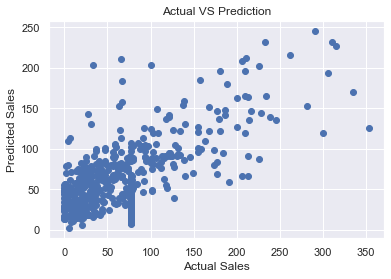

*****************************************************************************************
Scores for Lasso() are
Mean Absolute Error: 34.24603851162958
Mean Squared Error: 2009.8241532553982
Root Mean Squared Error: 44.831062370363234
R squared score:  0.47522387393921883
Cross Validation Score is : [0.50077335 0.38210584 0.49738794 0.4338878  0.50983842]
Mean Score : 0.46479867084000376
Difference : -0.010425203099215075


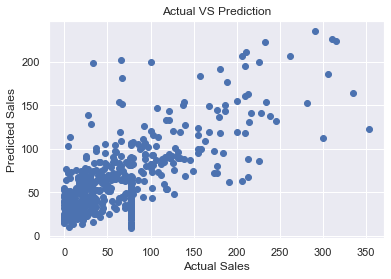

*****************************************************************************************
Scores for SVR() are
Mean Absolute Error: 39.972360298926915
Mean Squared Error: 3302.1737516638527
Root Mean Squared Error: 57.464543430395864
R squared score:  0.13778429512308465
Cross Validation Score is : [0.1523173  0.11579995 0.15194243 0.05450216 0.10304638]
Mean Score : 0.1155216443736468
Difference : -0.022262650749437854


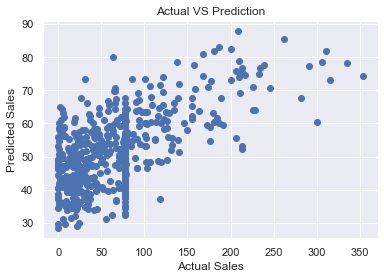

*****************************************************************************************
Scores for DecisionTreeRegressor() are
Mean Absolute Error: 41.527415549618254
Mean Squared Error: 3723.905556298663
Root Mean Squared Error: 61.023811387839935
R squared score:  0.027667804426918408
Cross Validation Score is : [-0.02422052  0.09952936 -0.19182639  0.0070748   0.3807723 ]
Mean Score : 0.05426590925160515
Difference : 0.02659810482468674


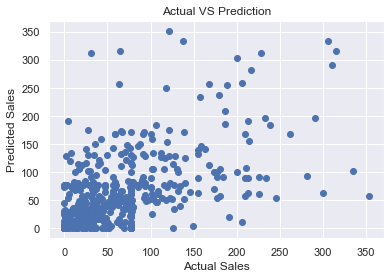

*****************************************************************************************
Scores for RandomForestRegressor() are
Mean Absolute Error: 30.272870873046866
Mean Squared Error: 1711.1635242246032
Root Mean Squared Error: 41.36621235047515
R squared score:  0.5532058046746986
Cross Validation Score is : [0.60279074 0.51481943 0.43911408 0.45733253 0.57841339]
Mean Score : 0.5184940358570513
Difference : -0.03471176881764726


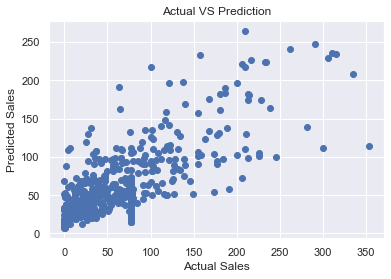

*****************************************************************************************
Scores for GradientBoostingRegressor() are
Mean Absolute Error: 29.453980002989578
Mean Squared Error: 1561.6879245892696
Root Mean Squared Error: 39.518197385372595
R squared score:  0.5922347047852818
Cross Validation Score is : [0.59000167 0.4973301  0.58325699 0.48540285 0.59011119]
Mean Score : 0.5492205630468965
Difference : -0.04301414173838536


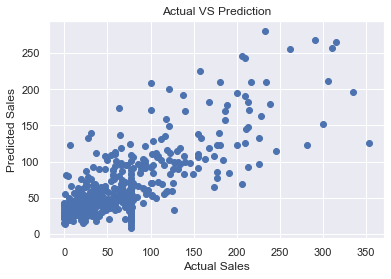

*****************************************************************************************


In [68]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("*****************************************************************************************")

# Hyperparamter Tuning and treating overfitting/underfitting

In [69]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [70]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [71]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [72]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.5907866824126125
The mean absolute error 30.52066208306482
root_mean_squared_error: 41.97230152985289


In [73]:
import joblib
joblib.dump(GB,"gross_collection.obj")

['gross_collection.obj']

In [74]:
GB_l=joblib.load('gross_collection.obj')

# model for Number of votes.

#### Scaling of Independent

In [75]:
X=dfn.drop(["votes"],axis=1)
y=dfn["votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

#### Predicting the best random state

In [76]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.5217016990806815
At random state 0, The test accuracy is :0.5170538913447196


At random state 1, The training accuracy is :0.5265856905918087
At random state 1, The test accuracy is :0.506066630068253


At random state 2, The training accuracy is :0.5202952879318217
At random state 2, The test accuracy is :0.5204728160028319


At random state 3, The training accuracy is :0.5128838484205782
At random state 3, The test accuracy is :0.5358584786736466


At random state 4, The training accuracy is :0.5191153535159461
At random state 4, The test accuracy is :0.5229822287778999


At random state 5, The training accuracy is :0.5490069582123799
At random state 5, The test accuracy is :0.46472005452805365


At random state 6, The training accuracy is :0.49268136335366874
At random state 6, The test accuracy is :0.5619436952103625


At random state 7, The training accuracy is :0.5098814670653123
At random state 7, The test accuracy is :0.5333173442

In [77]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(1035, 14) (1035,)
(511, 14) (511,)


Scores for LinearRegression() are
Mean Absolute Error: 76136.16183214587
Mean Squared Error: 11330375785.150824
Root Mean Squared Error: 106444.2379142752
R squared score:  0.506066630068253
Cross Validation Score is : [0.47121718 0.48112418 0.49291985 0.53360787 0.58455401]
Mean Score : 0.5126846191153942
Difference : 0.006617989047141171


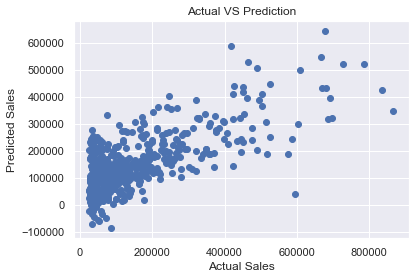

Scores for Lasso() are
Mean Absolute Error: 76135.8349314973
Mean Squared Error: 11330325879.832325
Root Mean Squared Error: 106444.0034940077
R squared score:  0.5060688056273528
Cross Validation Score is : [0.47121751 0.48112834 0.4929194  0.53361196 0.5845556 ]
Mean Score : 0.5126865611530457
Difference : 0.006617755525692881


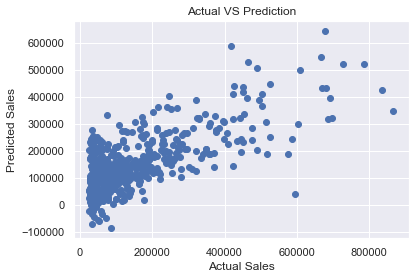

Scores for SVR() are
Mean Absolute Error: 102117.33065724708
Mean Squared Error: 26543615939.954006
Root Mean Squared Error: 162922.11617811132
R squared score:  -0.15713529012674265
Cross Validation Score is : [-0.16687094 -0.12349736 -0.18007726 -0.13382279 -0.14175953]
Mean Score : -0.14920557592733932
Difference : 0.007929714199403332


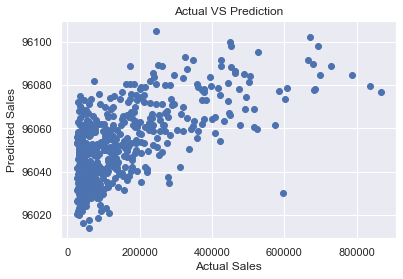

Scores for DecisionTreeRegressor() are
Mean Absolute Error: 76245.92954990215
Mean Squared Error: 13444511453.068493
Root Mean Squared Error: 115950.46982685535
R squared score:  0.4139035655107629
Cross Validation Score is : [0.42487443 0.51349869 0.42195903 0.28551309 0.57581129]
Mean Score : 0.44433130337279403
Difference : 0.030427737862031123


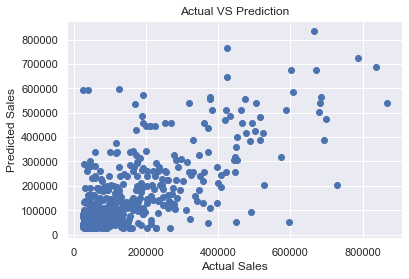

Scores for RandomForestRegressor() are
Mean Absolute Error: 58901.123268101765
Mean Squared Error: 7269629485.127204
Root Mean Squared Error: 85262.12221805885
R squared score:  0.6830897176023123
Cross Validation Score is : [0.62173334 0.65782189 0.67664944 0.69701801 0.71317204]
Mean Score : 0.6732789438501614
Difference : -0.009810773752150892


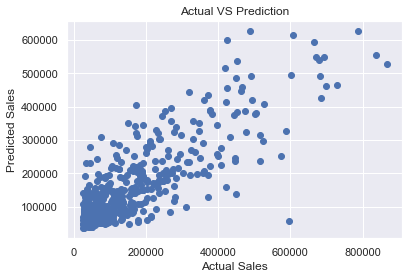

Scores for GradientBoostingRegressor() are
Mean Absolute Error: 54796.72794261505
Mean Squared Error: 6377575524.180443
Root Mean Squared Error: 79859.7240427266
R squared score:  0.7219776792592285
Cross Validation Score is : [0.68254276 0.68399321 0.70260965 0.76421807 0.73848847]
Mean Score : 0.714370432458154
Difference : -0.0076072468010744965


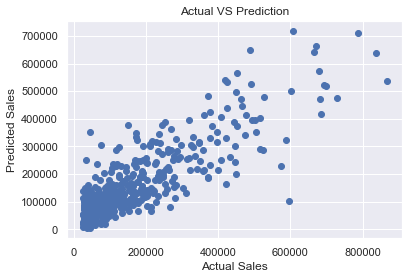

In [78]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==================================================================================================")

# Hyperparamter Tuning and treating overfitting/underfitting

In [79]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [80]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [81]:
GB1= GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 0.7089194967788188
The mean absolute error 55657.94786696767
root_mean_squared_error: 81713.63522890095


In [82]:
import joblib
joblib.dump(GB1,"votes.obj")

['votes.obj']

In [83]:
GB1_l=joblib.load('votes.obj')